# 分类问题

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## 读取数据
datapath = ""
data = pd.read_csv(datapath + "ionosphere_data.csv")

## data processing
data.replace({"column_a":{True:1,False:0},"column_b":{True:1,False:0},"column_ai":{'g':1,'b':0}},inplace=True)

data.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,...,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,column_ai
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [2]:
# 将x属性和y属性分开
y = data['column_ai'].copy()
x = data.drop('column_ai', axis=1)

## SVM模型

RMSE: 0.2668802563418119
Accuracy: 0.9287749287749287
Precision: 0.9287749287749287
Recall: 0.9287749287749287
F1: 0.9287749287749287
AUC: 0.9095238095238095


Text(66.5, 0.5, 'True label')

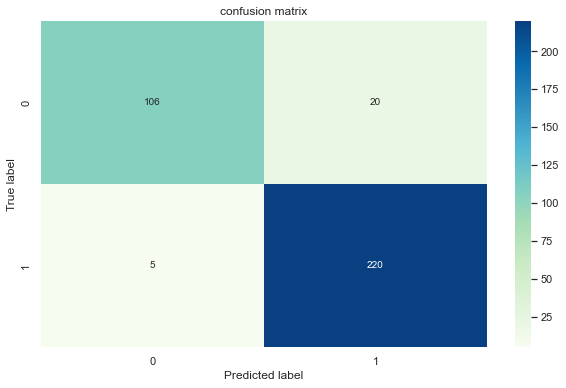

In [3]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVR
from sklearn.svm import SVC


# 10折交叉验证
k_fold = KFold(n_splits=10,shuffle=True,random_state=42)

# SVM模型
predict = []
true = []

for train_index, test_index in k_fold.split(x):
    train_x, test_x = x.iloc[train_index], x.iloc[test_index]
    train_y, test_y = y[train_index], y[test_index]
    
    SVCModel = SVC()
    SVCModel = SVCModel.fit(train_x,train_y)
    pred_y = SVCModel.predict(test_x)
    predict.extend(pred_y)
    true.extend(test_y)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("RMSE:",sqrt(MSE(predict,true)))
print("Accuracy:",accuracy_score(true,predict))
print("Precision:",precision_score(true,predict,average='micro'))
print("Recall:",recall_score(true,predict,average='micro'))
print("F1:",f1_score(true,predict,average='micro'))
# print(true)
# print(predict)
print("AUC:",roc_auc_score(true,predict,multi_class='ovo'))

# 数据可视化
sns.set()
f,ax=plt.subplots(figsize=(10,6))
C=confusion_matrix(true, predict, labels=[0, 1])
sns.heatmap(C,annot=True,ax=ax,cmap=plt.cm.GnBu,fmt='g') #热力图

ax.set_title('confusion matrix') #标题
ax.set_xlabel('Predicted label') #x轴
ax.set_ylabel('True label') #y轴

## Logistic回归

RMSE: 0.35001017486227815
Accuracy: 0.8774928774928775
Precision: 0.8774928774928775
Recall: 0.8774928774928775
F1: 0.8774928774928775
AUC: 0.8415873015873017


Text(66.5, 0.5, 'True label')

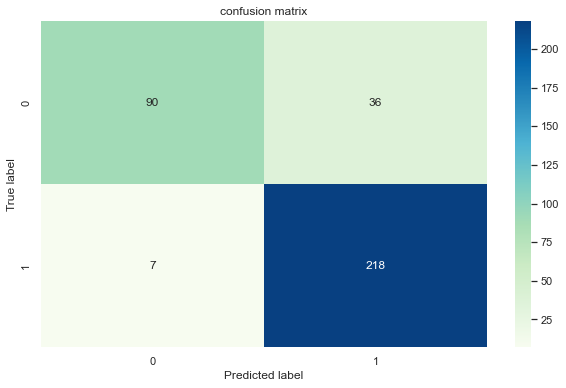

In [4]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# 10折交叉验证
k_fold = KFold(n_splits=10,shuffle=True,random_state=42)

predict = []
true = []

for train_index, test_index in k_fold.split(x):
    train_x, test_x = x.iloc[train_index], x.iloc[test_index]
    train_y, test_y = y[train_index], y[test_index]
    
    Model = LogisticRegression(random_state=42)
    Model = Model.fit(train_x,train_y)
    pred_y = Model.predict(test_x)
    predict.extend(pred_y)
    true.extend(test_y)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("RMSE:",sqrt(MSE(predict,true)))
print("Accuracy:",accuracy_score(true,predict))
print("Precision:",precision_score(true,predict,average='micro'))
print("Recall:",recall_score(true,predict,average='micro'))
print("F1:",f1_score(true,predict,average='micro'))
# print(true)
# print(predict)
print("AUC:",roc_auc_score(true,predict,multi_class='ovo'))

# 数据可视化
sns.set()
f,ax=plt.subplots(figsize=(10,6))
C=confusion_matrix(true, predict, labels=[0, 1])
sns.heatmap(C,annot=True,ax=ax,cmap=plt.cm.GnBu,fmt='g') #热力图

ax.set_title('confusion matrix') #标题
ax.set_xlabel('Predicted label') #x轴
ax.set_ylabel('True label') #y轴

## 随机森林

RMSE: 0.2614881801842454
Accuracy: 0.9316239316239316
Precision: 0.9316239316239316
Recall: 0.9316239316239316
F1: 0.9316239316239316
AUC: 0.9187301587301587


Text(66.5, 0.5, 'True label')

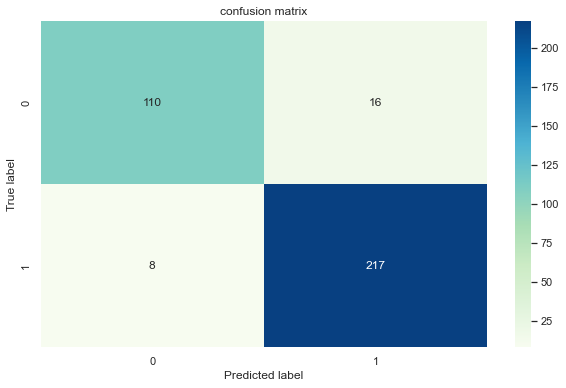

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

# 10折交叉验证
k_fold = KFold(n_splits=10,shuffle=True,random_state=42)

predict = []
true = []

# 随机森林模型
Model = RandomForestClassifier(random_state=42)

for train_index, test_index in k_fold.split(x):
    train_x, test_x = x.iloc[train_index], x.iloc[test_index]
    train_y, test_y = y[train_index], y[test_index]
    
    Model = Model.fit(train_x,train_y)
    pred_y = Model.predict(test_x)
    predict.extend(pred_y)
    true.extend(test_y)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("RMSE:",sqrt(MSE(predict,true)))
print("Accuracy:",accuracy_score(true,predict))
print("Precision:",precision_score(true,predict,average='micro'))
print("Recall:",recall_score(true,predict,average='micro'))
print("F1:",f1_score(true,predict,average='micro'))
# print(true)
# print(predict)
print("AUC:",roc_auc_score(true,predict,multi_class='ovo'))

# 数据可视化
sns.set()
f,ax=plt.subplots(figsize=(10,6))
C=confusion_matrix(true, predict, labels=[0, 1])
sns.heatmap(C,annot=True,ax=ax,cmap=plt.cm.GnBu,fmt='g') #热力图

ax.set_title('confusion matrix') #标题
ax.set_xlabel('Predicted label') #x轴
ax.set_ylabel('True label') #y轴

根据实验结果选择SVM分类模型对数据进行分类预测

## 训练SVM分类器

In [6]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
y_train = train_set['column_ai'].copy()
x_train = train_set.drop('column_ai', axis=1)
y_test = test_set['column_ai'].copy()
x_test = test_set.drop('column_ai', axis=1)

svc_clf = SVC(random_state=42)
svc_clf.fit(x_train, y_train)
y_scores = cross_val_predict(svc_clf, x_train, y_train, cv=10, method="decision_function")

In [7]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

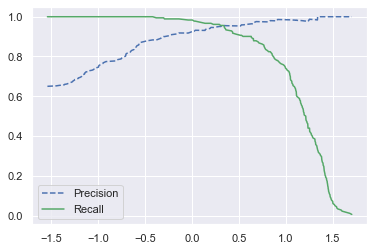

In [8]:
# 绘制精确率和召回率相对于阈值的函数图
import matplotlib.pyplot as plt
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend()
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Text(0, 0.5, 'precision')

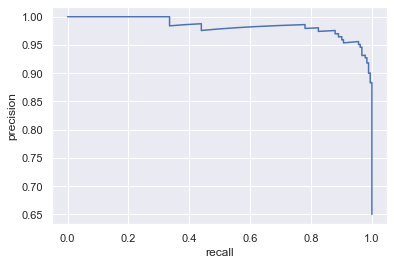

In [9]:
# 绘制精确率和召回率函数图
plt.plot(recalls, precisions)
plt.xlabel("recall")
plt.ylabel("precision")

In [10]:
# 精确度选择为95%
threshold_95_precision = thresholds[np.argmax(precisions >= 0.95)]
y_train_pred_95 = (y_scores >= threshold_95_precision)

In [11]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred_95)

0.9510869565217391

In [12]:
recall_score(y_train, y_train_pred_95)

0.9615384615384616

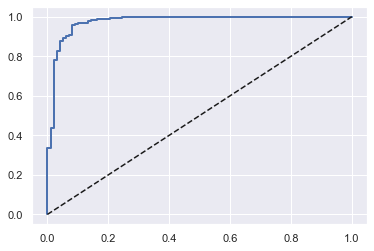

In [13]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plot_roc_curve(fpr, tpr)
plt.show()

In [14]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.9760596546310831

In [15]:
# 随机森林分类器
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train, cv=3, method="predict_proba")

In [16]:
y_scores_forest = y_probas_forest[:, 1] 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)

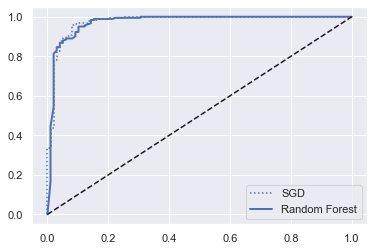

In [17]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

# 实验总结与体会
在解决回归预测问题或分类预测问题时，需要先对数据集进行数据处理，清洗异常数据和缺失数据。然后对数据进行可视化分析，选择较为适合的预测模型进行回归或分类。

当数据样本量较小时可以使用交叉验证优化模型，再通过调整相关参数或阈值选择较优模型。

对于一个机器学习模型，需要通过相关文档查阅各参数的使用方法和优化结构，调整模型参数。

对于预测得到的实验结果，可以通过对误差数据进行数据分析，优化初始模型结构。